Identifying the handwritten digits using NNs (Using dataset from Keras)

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# We get higher accuracy when the values are between 0 to 1 or -1 to 1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

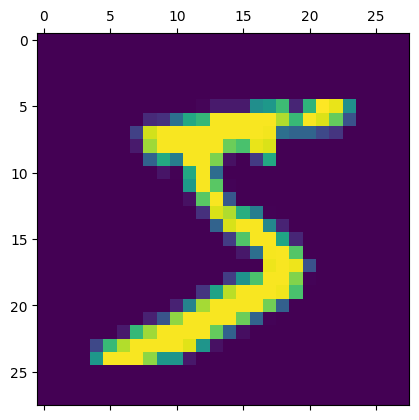

In [9]:
plt.matshow(X_train[0])

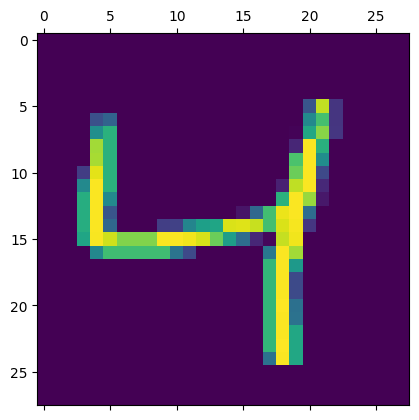

In [10]:
plt.matshow(X_train[2])

In [11]:
#Check the correctness of train and test data
y_train[2]

4

Flatten the training dataset, as we need have to pass 1D array to the input layer

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# reshape() function is being used to convert the 2D array into a 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

Create the model

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4701 - accuracy: 0.8767
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2533 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

Evaluate

In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9263


[0.26626431941986084, 0.9262999892234802]

Predict

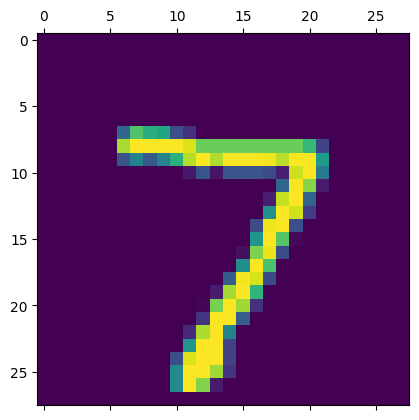

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([5.2860607e-03, 1.9178758e-08, 1.2566186e-02, 9.5099825e-01,
       1.2869487e-03, 1.1112809e-01, 2.5484603e-08, 9.9982941e-01,
       7.5136878e-02, 6.6925091e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
# Checking the actual values vs predicted values

# Since the final output contains scores for all 10 digits, we have to extract the digit corresponding to the maximum score
y_predicted_lables = [np.argmax(i) for i in y_predicted]
print(y_test[:5])
print(y_predicted_lables[:5])

[7 2 1 0 4]
[7, 2, 1, 0, 4]


In [21]:
# Confusion matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   7,   11,  923,   14,   10,    4,   11,   11,   38,    3],
       [   5,    0,   20,  910,    1,   33,    2,   11,   22,    6],
       [   2,    2,    5,    2,  926,    0,    6,    4,    7,   28],
       [  11,    3,    2,   23,    7,  796,   11,    8,   27,    4],
       [  16,    3,    9,    1,    8,   19,  899,    1,    2,    0],
       [   1,    9,   23,    4,    8,    1,    0,  953,    1,   28],
       [  10,   15,    6,   20,    9,   36,    8,   11,  851,    8],
       [  11,    8,    1,    9,   26,    7,    0,   22,    6,  919]])>

Text(95.72222222222221, 0.5, 'Truth')

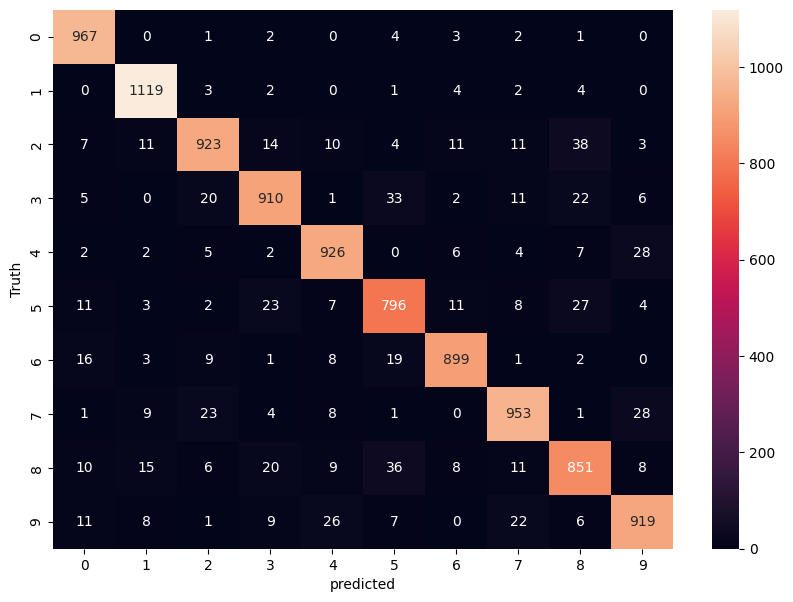

In [22]:
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

Let's add hidden layers and check if the performance increases

In [24]:
model = keras.Sequential([

    # keras comes with a built in flatten array function
    # keras.layers.Flatten(input_shape=(28,28)),

    # we are randomly cloosing number of nodes/ neurons in our hidden layer as 100
    # Always use relu as activation fn for hidden layers
    keras.layers.Dense(100, input_shape= (784,), activation="relu"),

    # last layer do not need input shape as it takes the input from the previous layer
    keras.layers.Dense(10, activation="sigmoid")
])

# code to log the epoch
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2714 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

Accuracy is increased from 82% to 92%

In [25]:
# Launching Tensor Board

%load_ext tensorboard
%tensorboard --logdir logs/fit